In [1]:
import sys
import os
from icecream import ic 
import csv
import numpy as np
import more_itertools
import matplotlib.pyplot as plt
import sympy as sp
from tqdm.notebook import tqdm
  
# current = os.path.dirname(os.path.realpath(__file__))
# parent = os.path.dirname(current)

current = os.curdir
# parent = os.path.dirname(current)
# sys.path.append(parent)
os.chdir("..")

from source.read_amplitudes import read_amplitudes, read_amplitudes_and_raw_squares, fix_operator_num_args, get_tree, fix_tree, fix_subscript, fix_subscripts, read_amplitudes_and_squares
import sympy as sp
from source.SympyPrefix import prefix_to_sympy, sympy_to_prefix

  

In [2]:
os.listdir()

['source', 'notebooks', 'dev']

In [3]:
ampl_folders_prefix = "../QED_AllParticles_IO/out/ampl/"
# sqampl_folders_prefix = "../QED_AllParticles_IO/out/sq_ampl/"
sqampl_raw_folders_prefix = "../QED_AllParticles_IO/out/sq_ampl_raw/"
amplitudes_folders_names = ["1to2/", "2to1/", "2to2/", "2to3/", "3to2/",] 
amplitudes_folders = [ampl_folders_prefix+a for a in amplitudes_folders_names]
sqamplitudes_raw_folders_names = ["1to2/", "2to1/", "2to2/", "2to3/", "3to2/",] 
sqamplitudes_folders = [sqampl_raw_folders_prefix+a for a in sqamplitudes_raw_folders_names]

In [7]:

amplitudes = dict()
sqamplitudes = dict()
for amplitudes_folder, sqamplitudes_folder, name in zip(amplitudes_folders, sqamplitudes_folders, amplitudes_folders_names):
    ic(name)

    amplitudes_files = os.listdir(amplitudes_folder)
    sqamplitudes_files = os.listdir(sqamplitudes_folder)
    ampl, sqampl_raw = read_amplitudes_and_raw_squares(amplitudes_folder, sqamplitudes_folder)

    ampls_prefix = []
    print("Working on amplitudes")
    for exp in tqdm(ampl):
        tree = get_tree(exp)
        tree = fix_tree(tree)
        final_expr = fix_subscripts(tree)
        ampls_prefix.append(final_expr)

    sqampls_prefix = []
    print("Working on squared amplitudes")
    for exp in tqdm(sqampl_raw):
        simplified = sp.factor(exp)
        prefix = sympy_to_prefix(simplified)
        sqampls_prefix.append(prefix)
    amplitudes[name] = ampls_prefix
    sqamplitudes[name] = sqampls_prefix

ic| name: '1to2/'
ic| len(files_ampl): 27
ic| len(files_sqampl): 27


Working on amplitudes


  0%|          | 0/27 [00:00<?, ?it/s]

Working on squared amplitudes


  0%|          | 0/27 [00:00<?, ?it/s]

ic| name: '2to1/'
ic| len(files_ampl): 27
ic| len(files_sqampl): 27


Working on amplitudes


  0%|          | 0/27 [00:00<?, ?it/s]

Working on squared amplitudes


  0%|          | 0/27 [00:00<?, ?it/s]

ic| name: '2to2/'
ic| len(files_ampl): 279
ic| len(files_sqampl): 279


Working on amplitudes


  0%|          | 0/342 [00:00<?, ?it/s]

Working on squared amplitudes


  0%|          | 0/342 [00:00<?, ?it/s]

ic| name: '2to3/'
ic| len(files_ampl): 441
ic| len(files_sqampl): 441


Working on amplitudes


  0%|          | 0/2016 [00:00<?, ?it/s]

Working on squared amplitudes


  0%|          | 0/2016 [00:00<?, ?it/s]

ic| name: '3to2/'
ic| len(files_ampl): 441
ic| len(files_sqampl): 441


Working on amplitudes


  0%|          | 0/2016 [00:00<?, ?it/s]

Working on squared amplitudes


  0%|          | 0/2016 [00:00<?, ?it/s]

In [8]:
all_amplitudes = []
for key in amplitudes.keys():
    for x in amplitudes[key]:
        all_amplitudes.append(x)

all_sqamplitudes = []
for key in sqamplitudes.keys():
    for x in sqamplitudes[key]:
        all_sqamplitudes.append(x)

In [9]:
len(all_amplitudes)
len(all_sqamplitudes)

4428

In [5]:
outfile_amplitudes = "../data.nosync/QED_amplitudes_TreeLevel_UpTo3to3.txt"
outfile_sqamplitudes = "../data.nosync/QED_sqamplitudes_TreeLevel_UpTo3to3.txt"

In [11]:
with open(outfile_amplitudes, 'w') as f:
    for line in all_amplitudes:
        line = ";".join(line)
        f.write(line)
        f.write("\n")

with open(outfile_sqamplitudes, 'w') as f:
    for line in all_sqamplitudes:
        line = ";".join(line)
        f.write(line)
        f.write("\n")

In [6]:
X = []
with open(outfile_amplitudes, 'r') as f:
    for line in f.readlines() :
        line = line.split(";")
        # have to remove new line character for some reason
        line[-1] = line[-1].replace("\n", "")
        X.append(line)

y = []
with open(outfile_sqamplitudes, 'r') as f:
    for line in f.readlines() :
        line = line.split(";")
        # have to remove new line character for some reason
        line[-1] = line[-1].replace("\n", "")
        y.append(line)

In [13]:
ic(X == all_amplitudes);
ic(y == all_sqamplitudes);

ic| X == all_amplitudes: True
ic| y == all_sqamplitudes: True


In [8]:
ampls_lens = [len(x) for x in X]
sqampls_lens = [len(x) for x in y]

ic| np.mean(ampls_lens): 163.789972899729
ic| np.mean(sqampls_lens): 267.45867208672087


267.45867208672087

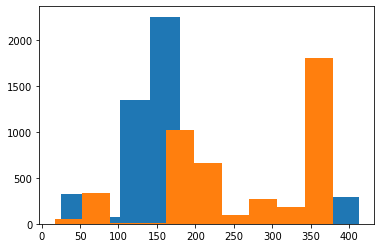

In [11]:
plt.hist(ampls_lens)
plt.hist(sqampls_lens)
ic(np.mean(ampls_lens))
ic(np.mean(sqampls_lens))